c:\users\jayad\appdata\local\programs\python\python39\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.3775 - val_loss: 0.1919
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1812 - val_loss: 0.1534
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1494 - val_loss: 0.1338
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1317 - val_loss: 0.1213
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1205 - val_loss: 0.1129
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1125 - val_loss: 0.1072
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1073 - val_loss: 0.1030
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.1032 - val_loss: 0.0998
Epoch 9/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1003 - val_loss: 0.0976
Epoch 10/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0982 - val_loss: 0.0959
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


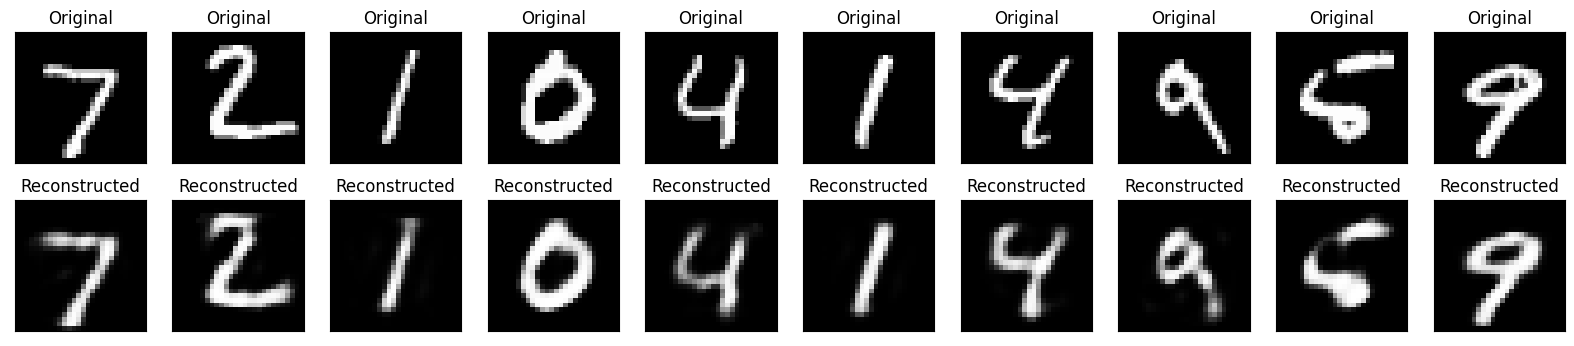

Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.4113 - val_loss: 0.2259
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.2124 - val_loss: 0.1826
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1788 - val_loss: 0.1627
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1606 - val_loss: 0.1508
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1504 - val_loss: 0.1451
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1452 - val_loss: 0.1414
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1419 - val_loss: 0.1389
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1396 - val_loss: 0.1369
Epoch 9/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1379 - val_loss: 0.1350
Epoch 10/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1358 - val_loss: 0.1334
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


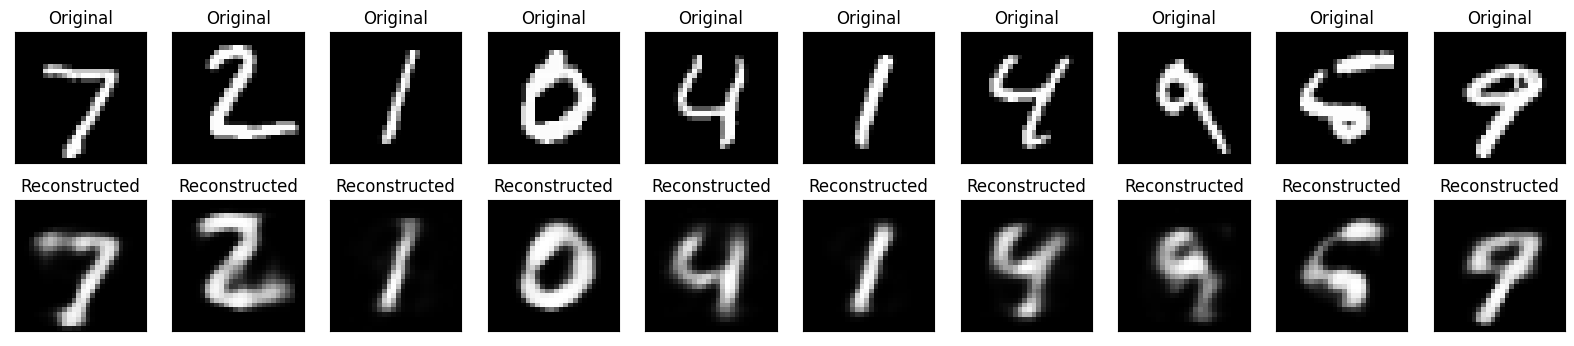

In [1]:
# Import necessary libraries
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Load the MNIST dataset
(x_train, _), (x_test, _) = tf.keras.datasets.mnist.load_data()

# Normalize the images to have pixel values between 0 and 1
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# Flatten the images from 28x28 to 784 (1D) so that they can be fed into fully connected layers
x_train = x_train.reshape((x_train.shape[0], 784))
x_test = x_test.reshape((x_test.shape[0], 784))

# Step 2: Define the Autoencoder Model
# Define the encoder part
encoder_input = tf.keras.layers.Input(shape=(784,))
encoded = tf.keras.layers.Dense(32, activation='relu')(encoder_input)

# Define the decoder part
decoded = tf.keras.layers.Dense(784, activation='sigmoid')(encoded)

# Define the autoencoder model using the encoder and decoder
autoencoder = tf.keras.models.Model(encoder_input, decoded)

# Define an encoder model that will extract the compressed representation
encoder = tf.keras.models.Model(encoder_input, encoded)

# Step 3: Compile and Train the Autoencoder
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train the autoencoder model
autoencoder.fit(x_train, x_train, epochs=10, batch_size=256, validation_data=(x_test, x_test))

# Step 4: Plot Original vs. Reconstructed Images
# Get reconstructed images from the autoencoder
reconstructed = autoencoder.predict(x_test)

# Plot the first 10 original and reconstructed images
n = 10  # Number of images to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Original images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap="gray")
    plt.title("Original")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Reconstructed images
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(reconstructed[i].reshape(28, 28), cmap="gray")
    plt.title("Reconstructed")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

# Step 5: Modify Latent Dimension and Analyze Results
# Example with latent dimension size 16
encoder_input = tf.keras.layers.Input(shape=(784,))
encoded = tf.keras.layers.Dense(16, activation='relu')(encoder_input)
decoded = tf.keras.layers.Dense(784, activation='sigmoid')(encoded)
autoencoder = tf.keras.models.Model(encoder_input, decoded)

autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train the autoencoder model with latent dimension size 16
autoencoder.fit(x_train, x_train, epochs=10, batch_size=256, validation_data=(x_test, x_test))

# Get reconstructed images from the autoencoder with latent dimension 16
reconstructed = autoencoder.predict(x_test)

# Plot the first 10 original and reconstructed images
plt.figure(figsize=(20, 4))
for i in range(n):
    # Original images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap="gray")
    plt.title("Original")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Reconstructed images
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(reconstructed[i].reshape(28, 28), cmap="gray")
    plt.title("Reconstructed")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()


Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.3720 - val_loss: 0.2159
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.2075 - val_loss: 0.1845
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1812 - val_loss: 0.1676
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1645 - val_loss: 0.1517
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1513 - val_loss: 0.1425
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1418 - val_loss: 0.1370
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1373 - val_loss: 0.1333
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1335 - val_loss: 0.1295
Epoch 9/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1302 - val_loss: 0.1280
Epoch 10/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1286 - val_loss: 0.1272
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 827us/step


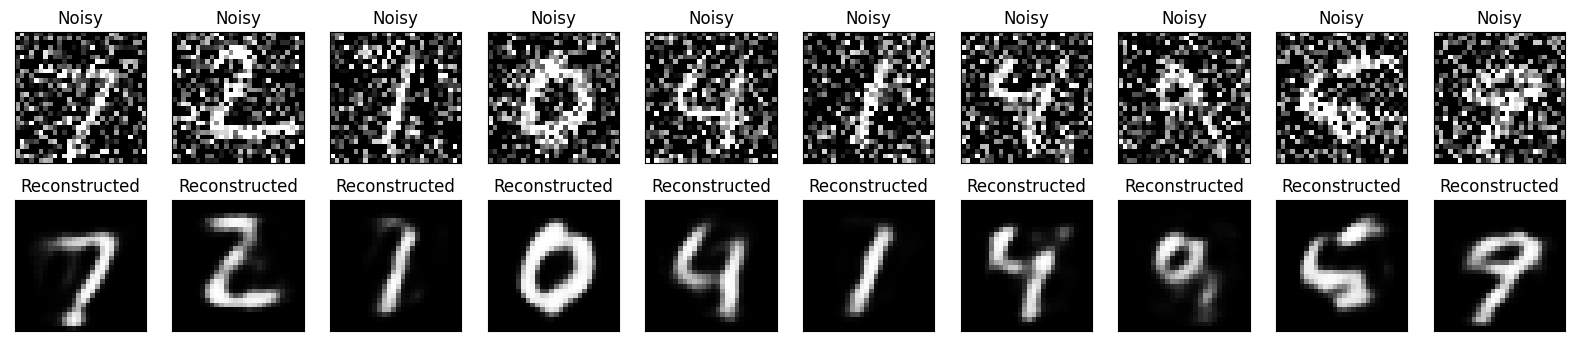

Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.1494 - val_loss: 0.1117
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1119 - val_loss: 0.1062
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1068 - val_loss: 0.1027
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1034 - val_loss: 0.0996
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1005 - val_loss: 0.0973
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0981 - val_loss: 0.0955
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0965 - val_loss: 0.0943
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0954 - val_loss: 0.0936
Epoch 9/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0947 - val_loss: 0.0931
Epoch 10/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0945 - val_loss: 0.0928
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 821us/step


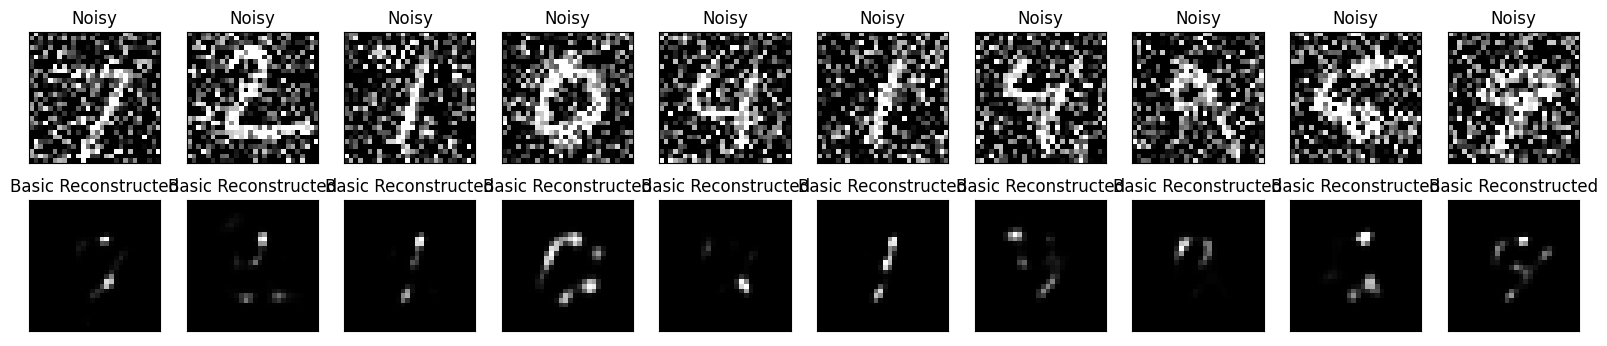

Real-World Use Case Example: Denoising Autoencoders in Medical Imaging
Denoising autoencoders can be extremely helpful in fields like medical imaging.
For example, in MRI or CT scans, images often have noise due to various factors such as:
- Low signal-to-noise ratio
- Movement during scanning
- Limited resolution of the imaging equipment
Denoising autoencoders can be trained to remove the noise from these medical images while retaining the important features.
This helps doctors and medical professionals get clearer images for better diagnosis.
In this scenario, the denoising autoencoder would take a noisy medical scan (e.g., MRI image)
as input, and its output would be a cleaner, denoised version of the scan, making it easier to spot critical features
such as tumors or fractures.


In [2]:
# Import necessary libraries
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Load the MNIST dataset
(x_train, _), (x_test, _) = tf.keras.datasets.mnist.load_data()

# Normalize the images to have pixel values between 0 and 1
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# Flatten the images from 28x28 to 784 (1D) so that they can be fed into fully connected layers
x_train = x_train.reshape((x_train.shape[0], 784))
x_test = x_test.reshape((x_test.shape[0], 784))

# Step 2: Add Gaussian Noise to the Images (Denoising Autoencoder)
def add_noise(images, noise_factor=0.5):
    """
    Add Gaussian noise to images.
    `noise_factor` controls the intensity of the noise.
    """
    noise = np.random.normal(0, noise_factor, images.shape)  # Generate noise
    noisy_images = images + noise  # Add noise to the images
    noisy_images = np.clip(noisy_images, 0., 1.)  # Ensure pixel values stay in the range [0, 1]
    return noisy_images

# Add noise to the training and test images
x_train_noisy = add_noise(x_train)
x_test_noisy = add_noise(x_test)

# Step 3: Define the Denoising Autoencoder Model
# Define the encoder part
encoder_input = tf.keras.layers.Input(shape=(784,))
encoded = tf.keras.layers.Dense(32, activation='relu')(encoder_input)

# Define the decoder part
decoded = tf.keras.layers.Dense(784, activation='sigmoid')(encoded)

# Define the autoencoder model (the full model)
denoising_autoencoder = tf.keras.models.Model(encoder_input, decoded)

# Step 4: Compile and Train the Denoising Autoencoder
denoising_autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train the model with noisy inputs but clean outputs
# The model learns to remove noise from the images and reconstruct the clean version
denoising_autoencoder.fit(x_train_noisy, x_train, epochs=10, batch_size=256, validation_data=(x_test_noisy, x_test))

# Step 5: Visualize Noisy vs. Reconstructed Images
# Get reconstructed (denoised) images from the autoencoder
reconstructed = denoising_autoencoder.predict(x_test_noisy)

# Plot the first 10 noisy and reconstructed images
n = 10  # Number of images to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Noisy images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28), cmap="gray")
    plt.title("Noisy")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Reconstructed (denoised) images
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(reconstructed[i].reshape(28, 28), cmap="gray")
    plt.title("Reconstructed")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

# Step 6: Compare the Performance of Basic vs. Denoising Autoencoder
# Define the basic autoencoder (no noise added during training)
basic_autoencoder = tf.keras.models.Model(encoder_input, decoded)

# Compile and train the basic autoencoder with clean data (no noise)
basic_autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
basic_autoencoder.fit(x_train, x_train, epochs=10, batch_size=256, validation_data=(x_test, x_test))

# Get reconstructed images from the basic autoencoder (using noisy inputs)
reconstructed_basic = basic_autoencoder.predict(x_test_noisy)

# Plot the first 10 noisy and reconstructed images from the basic autoencoder
plt.figure(figsize=(20, 4))
for i in range(n):
    # Noisy images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28), cmap="gray")
    plt.title("Noisy")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Reconstructed images from basic autoencoder (without noise removal)
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(reconstructed_basic[i].reshape(28, 28), cmap="gray")
    plt.title("Basic Reconstructed")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

# Step 7: Real-World Use Case Example - Denoising Autoencoders in Medical Imaging

# Real-World Use Case Explanation:
print("Real-World Use Case Example: Denoising Autoencoders in Medical Imaging")
print("Denoising autoencoders can be extremely helpful in fields like medical imaging.")
print("For example, in MRI or CT scans, images often have noise due to various factors such as:")
print("- Low signal-to-noise ratio")
print("- Movement during scanning")
print("- Limited resolution of the imaging equipment")
print("Denoising autoencoders can be trained to remove the noise from these medical images while retaining the important features.")
print("This helps doctors and medical professionals get clearer images for better diagnosis.")
print("In this scenario, the denoising autoencoder would take a noisy medical scan (e.g., MRI image)")
print("as input, and its output would be a cleaner, denoised version of the scan, making it easier to spot critical features")
print("such as tumors or fractures.")


In [12]:
# Import necessary libraries
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Load a text dataset
# Here we'll use a smaller portion of the Shakespeare dataset for faster experimentation
path_to_file = tf.keras.utils.get_file("shakespeare.txt", "https://storage.googleapis.com/download.tensorflow.org/data/shakespeare.txt")

# Read the text file
with open(path_to_file, 'r') as file:
    text = file.read()

# Use a smaller portion of the dataset (first 10000 characters)
text = text[:10000]

# Step 2: Convert text into a sequence of characters
# Create a mapping from characters to integers and vice versa
vocab = sorted(set(text))  # Get all unique characters in the text
char_to_index = {char: idx for idx, char in enumerate(vocab)}  # Mapping from char to index
index_to_char = {idx: char for idx, char in enumerate(vocab)}  # Mapping from index to char

# Convert the text into numerical values based on the characters
text_as_int = np.array([char_to_index[char] for char in text])

# Step 3: Prepare the dataset for training
# We'll create sequences of characters as inputs (X) and the next character as the label (y)
seq_length = 50  # Reduce the sequence length to speed up training
X = []
y = []

# Create sequences of 50 characters and their corresponding next character
for i in range(0, len(text_as_int) - seq_length, 1):
    X.append(text_as_int[i:i+seq_length])
    y.append(text_as_int[i+seq_length])

X = np.array(X)
y = np.array(y)

# Reshape X for LSTM input (batch_size, seq_length, num_features)
X = X.reshape((X.shape[0], X.shape[1], 1))  # 1 is the number of features (characters)

# Normalize the input values to be between 0 and 1
X = X / float(len(vocab))

# Step 4: Define the RNN model using LSTM
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(128, input_shape=(X.shape[1], X.shape[2]), return_sequences=True),  # Reduced units for faster training
    tf.keras.layers.LSTM(128),  # Reduced units for faster training
    tf.keras.layers.Dense(len(vocab), activation='softmax')  # Output layer with softmax activation for character prediction
])

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam')

# Step 5: Train the model (reduced epochs for faster testing)
model.fit(X, y, epochs=10, batch_size=64)  # Reduced epochs to 10 for faster training

# Step 6: Generate text by sampling one character at a time
def generate_text(model, start_string, num_generate=500, temperature=1.0):
    """
    Function to generate new text using the trained model.
    `start_string` is the string to start generation from.
    `num_generate` is the number of characters to generate.
    `temperature` controls the randomness of predictions.
    """
    input_eval = [char_to_index[s] for s in start_string]
    input_eval = np.array(input_eval)
    input_eval = input_eval.reshape((1, len(input_eval), 1))  # Reshape for LSTM input (batch_size, seq_length, num_features)
    input_eval = input_eval / float(len(vocab))  # Normalize

    generated_text = start_string

    for _ in range(num_generate):
        predictions = model.predict(input_eval, verbose=0)  # Get the model's predictions
        predictions = predictions / temperature  # Temperature scaling

        # Sample the next character using the predictions
        predicted_id = np.argmax(predictions[0])  # Choose the character with the highest probability (fix indexing)
        predicted_char = index_to_char[predicted_id]  # Convert index back to character

        generated_text += predicted_char  # Append the generated character

        # Update the input for the next character generation
        input_eval = np.append(input_eval[0][1:], [[predicted_id / float(len(vocab))]], axis=0)
        input_eval = input_eval.reshape((1, len(input_eval), 1))  # Ensure correct shape for next prediction

    return generated_text

# Generate text using the trained model
start_string = "ROMEO: "
generated_text = generate_text(model, start_string, num_generate=500, temperature=1.0)
print("Generated Text:")
print(generated_text)

# Step 7: Explain the role of temperature scaling
print("\nExplanation: Temperature scaling controls the randomness of the predictions during text generation.")
print("When the temperature is high (e.g., 1.0), the model is more likely to pick less probable characters, creating more randomness.")
print("When the temperature is low (e.g., 0.2), the model is more likely to pick the most probable character, leading to more repetitive and predictable text.")


Epoch 1/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 11s 57ms/step - loss: 3.4167
Epoch 2/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 9s 56ms/step - loss: 3.2193
Epoch 3/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 9s 56ms/step - loss: 3.1895
Epoch 4/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 9s 59ms/step - loss: 3.0654
Epoch 5/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 9s 59ms/step - loss: 2.9624
Epoch 6/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 9s 58ms/step - loss: 2.8628
Epoch 7/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 9s 59ms/step - loss: 2.7938
Epoch 8/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 9s 59ms/step - loss: 2.7604
Epoch 9/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 9s 57ms/step - loss: 2.7117
Epoch 10/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 9s 58ms/step - loss: 2.6784
Generated Text:
ROMEO: 

Fne  

FE te  
Fh   

Fi,  

Fie  

Fi   

Fi,  

Fie  

Fi   

Fi,  

Fie  

Fi   

Fi,  

Fie  

Fi   

Fi,  

Fie  

Fi   

Fi,  

Fie  

Fi   

Fi,  

Fie  

Fi   

Fi,  

Fie  

Fi   

Fi,  

Fie  

Fi   

Fi,  

Fie  

Fi   

Fi,  

Fie  

Fi   

Fi,  

Fie  

Fi   

Fi,  

Fie  

Fi   

In [13]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

# Step 1: Load the IMDB sentiment dataset
# This dataset contains movie reviews and labels (1 for positive, 0 for negative)
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.imdb.load_data(num_words=10000)  # Limit vocabulary to the top 10,000 words

# Step 2: Preprocess the text data by tokenization and padding sequences
# Tokenization has already been done (IMDB dataset is preprocessed). We now pad the sequences to ensure all reviews have the same length.
maxlen = 500  # Limit reviews to 500 words for uniformity
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

# Step 3: Define the LSTM-based model
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(10000, 128, input_length=maxlen),  # Embedding layer for word vectors
    tf.keras.layers.LSTM(128),  # LSTM layer with 128 units
    tf.keras.layers.Dense(1, activation='sigmoid')  # Output layer with sigmoid activation for binary classification
])

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Step 4: Train the model
model.fit(x_train, y_train, epochs=3, batch_size=64, validation_data=(x_test, y_test))

# Step 5: Evaluate the model on the test set
y_pred = model.predict(x_test)
y_pred = (y_pred > 0.5).astype(int)  # Convert probabilities to 0 or 1 labels

# Step 6: Generate confusion matrix and classification report
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print confusion matrix and classification report
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

# Step 7: Explanation about precision-recall tradeoff
print("\nExplanation: In sentiment classification, precision and recall are important metrics to evaluate the model.")
print("Precision is the percentage of correctly predicted positive reviews out of all predicted positive reviews.")
print("Recall is the percentage of correctly predicted positive reviews out of all actual positive reviews.")
print("A higher precision means fewer false positives, while higher recall means fewer false negatives.")
print("The precision-recall tradeoff is important because in real-world scenarios, we might want to prioritize one over the other depending on the application.")


17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/3


c:\users\jayad\appdata\local\programs\python\python39\lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


391/391 ━━━━━━━━━━━━━━━━━━━━ 236s 599ms/step - accuracy: 0.7039 - loss: 0.5476 - val_accuracy: 0.8458 - val_loss: 0.3734
Epoch 2/3
391/391 ━━━━━━━━━━━━━━━━━━━━ 243s 622ms/step - accuracy: 0.8753 - loss: 0.3094 - val_accuracy: 0.8555 - val_loss: 0.3442
Epoch 3/3
391/391 ━━━━━━━━━━━━━━━━━━━━ 292s 747ms/step - accuracy: 0.9195 - loss: 0.2125 - val_accuracy: 0.8724 - val_loss: 0.3230
782/782 ━━━━━━━━━━━━━━━━━━━━ 60s 77ms/step
Confusion Matrix:
[[10967  1533]
 [ 1656 10844]]

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.88      0.87     12500
           1       0.88      0.87      0.87     12500

    accuracy                           0.87     25000
   macro avg       0.87      0.87      0.87     25000
weighted avg       0.87      0.87      0.87     25000


Explanation: In sentiment classification, precision and recall are important metrics to evaluate the model.
Precision is the percentage of correctly predicted positive revie